In [1]:
import numpy as np
import os

In [2]:
def load_point_cloud_ply(path):
    with open(path, "r") as f:
        lines = f.readlines()

    # find end of header robustly
    end_header_idx = None
    for idx, line in enumerate(lines):
        if line.strip() == "end_header":
            end_header_idx = idx + 1
            break
    if end_header_idx is None:
        raise ValueError(f"No 'end_header' found in PLY file: {path}")

    points = []
    for line in lines[end_header_idx:]:
        parts = line.strip().split()
        if len(parts) < 3:
            continue
        x, y, z = map(float, parts[:3])
        points.append([x, y, z])
    return np.array(points)

In [3]:
particle_dir = "../tmp/test"
steps = 7
particle_list = []
for i in range(steps):
    path = os.path.join(particle_dir, f"cur_particles_step_{i}.ply")
    particle_list.append(load_point_cloud_ply(path))

particle_list = np.stack(particle_list)
path = os.path.join(particle_dir, f"goal_particles.ply")
goal_particle = load_point_cloud_ply(path)

len particles 20000
outlier ids: [5720, 5721, 5722, 5723, 5724, 5725, 5726, 5727, 5728, 5729, 5730, 5731, 5732, 5733, 5734, 5735, 5736, 5737, 5738, 5739, 5740, 5741, 5742, 5743, 5744, 5745, 5746, 5747, 5748, 5749, 5750, 5751, 5752, 5753, 5754, 5755, 5756, 5757, 5758, 5759, 5760, 5761, 5762, 5763, 5764, 5765, 5766, 5767, 5768, 5769, 5770, 5771, 5772, 5773, 5774, 5775, 5776, 5777, 5778, 5779, 5780, 5781, 5782, 5783, 5784, 5785, 5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795, 5796, 5797, 5798, 5799, 5800, 5801, 5802, 5803, 5804, 5805, 5806, 5807, 5808, 5809, 5810, 5811, 5812, 5813, 5814, 5815, 5816, 5817, 5818, 5819, 5820, 5821, 5822, 5823, 5824, 5825, 5826, 5827, 5828, 5829, 5830, 5831, 5832, 5833, 5834, 5835, 5836, 5837, 5838, 5839, 5840, 5841, 5842, 5843, 5844, 5845, 5846, 5847, 5848, 5849, 5850, 5851, 5852, 5853, 5854, 5855, 5856, 5857, 5858, 5859, 5860, 5861, 5862, 5863, 5864, 5865, 5866, 5867, 5868, 5869, 5870, 5871, 5872, 5873, 5874, 5875, 5876, 5877, 5878, 5879, 5880, 

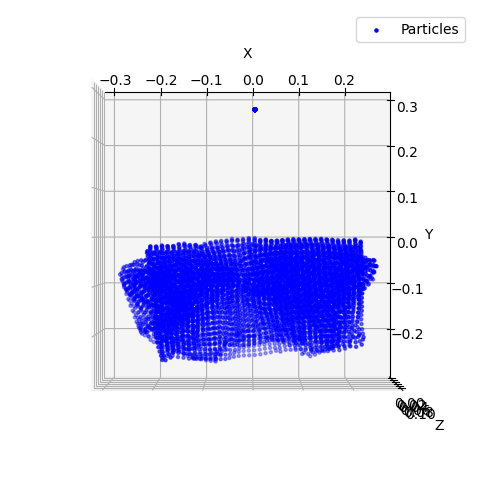

len outlier_ids 14280
len particles 5720
outlier ids: []


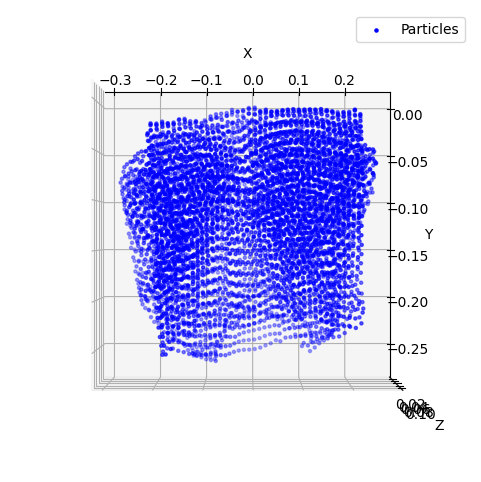

len particles 5720
outlier ids: []


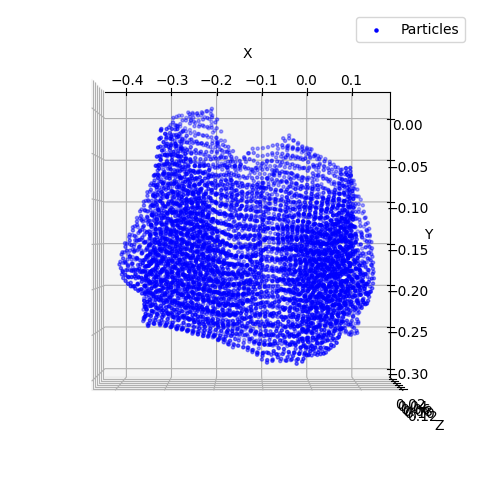

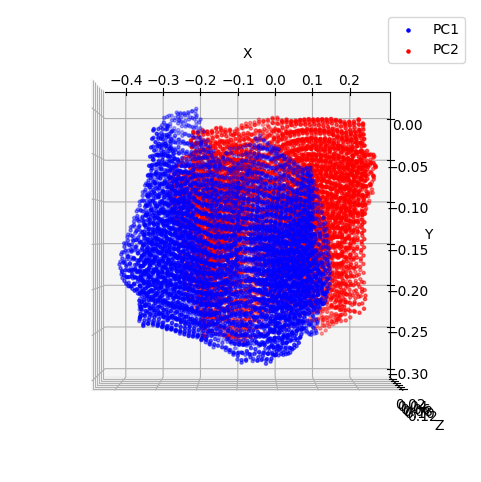

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa
import numpy as np

def plot_point_clouds(particles, top_down=False, show_ids=False, outlier_range=None):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    print('len particles', len(particles))

    ax.scatter(particles[:,0], particles[:,1], particles[:,2], 
               s=5, c='blue', label='Particles')

    outliers_ids = []
    if show_ids and outlier_range is not None:
        y_min, y_max = outlier_range
        for i, (x, y, z) in enumerate(particles):
            if y_min < y < y_max:
                #ax.text(x, y, z, str(i), fontsize=6, color='red')
                outliers_ids.append(i)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

    if top_down:
        ax.view_init(elev=90, azim=-90)  # top-down (z-axis pointing out of the screen)

    print('outlier ids:', outliers_ids)
    plt.show()
    return outliers_ids  # return list of indices


def plot_all_steps(particle_list, top_down=False):
    steps = len(particle_list)
    rows, cols = 2, 4   # 2 rows, 4 columns
    fig = plt.figure(figsize=(16, 8))  # adjust size

    for i in range(steps):
        ax = fig.add_subplot(rows, cols, i+1, projection='3d')
        particles = particle_list[i]

        ax.scatter(particles[:,0], particles[:,1], particles[:,2], 
                   s=5, c='blue')

        ax.set_title(f"Step {i}")
        ax.set_xticks([])  # hide axis ticks for cleaner look
        ax.set_yticks([])
        ax.set_zticks([])

        if top_down:
            ax.view_init(elev=90, azim=-90)  # top-down view

    plt.tight_layout()
    plt.show()

def plot_two_point_clouds(pc1, pc2, top_down=False, labels=('PC1', 'PC2'), colors=('blue', 'red'), s=5):
    """
    Plot two point clouds in the same 3D figure.

    Args:
        pc1, pc2: np.ndarray of shape (N,3) and (M,3)
        top_down: bool, if True, view along z-axis
        labels: tuple of labels for the legend
        colors: tuple of colors for each point cloud
        s: point size
    """
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(pc1[:,0], pc1[:,1], pc1[:,2], c=colors[0], s=s, label=labels[0])
    ax.scatter(pc2[:,0], pc2[:,1], pc2[:,2], c=colors[1], s=s, label=labels[1])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

    if top_down:
        ax.view_init(elev=90, azim=-90)  # top-down view

    plt.show()


# === Example usage ===

# Step 1: Find outliers in goal_particle
outliers_ids = plot_point_clouds(goal_particle, top_down=True, show_ids=True, outlier_range=(0.2, 0.3))
print('len outlier_ids', len(outliers_ids))

# Step 2: Remove those points from goal_particle and last step
goal_particle_clean = np.delete(goal_particle, outliers_ids, axis=0)
last_step_particles = particle_list[-1]
last_step_particles_clean = np.delete(last_step_particles, outliers_ids, axis=0)

# Step 3: Plot again without outliers
plot_point_clouds(goal_particle_clean, top_down=True)
plot_point_clouds(last_step_particles_clean, top_down=True)

plot_two_point_clouds(last_step_particles_clean, goal_particle_clean, top_down=True)


In [5]:
## These semantics are borrowed from CLASP paper

import numpy as np
import open3d as o3d
from copy import deepcopy
from scipy.spatial import cKDTree

def rigid_transform_3D(A, B):
    assert A.shape == B.shape, f"Shape mismatch: {A.shape} vs {B.shape}"

    num_rows, num_cols = A.shape
    if num_rows != 3:
        raise ValueError(f"matrix A is not 3xN, it is {num_rows}x{num_cols}")

    num_rows, num_cols = B.shape
    if num_rows != 3:
        raise ValueError(f"matrix B is not 3xN, it is {num_rows}x{num_cols}")

    # check for NaNs or Infs
    if not np.isfinite(A).all() or not np.isfinite(B).all():
        raise ValueError("NaN or Inf detected in input point sets!")

    # find mean column wise
    centroid_A = np.mean(A, axis=1, keepdims=True)
    centroid_B = np.mean(B, axis=1, keepdims=True)

    # subtract mean
    Am = A - centroid_A
    Bm = B - centroid_B

    H = Am @ Bm.T

    # check covariance matrix
    # if not np.isfinite(H).all():
    #     raise ValueError("NaN or Inf detected in covariance matrix H!")
    # if np.linalg.matrix_rank(H) < 3:
    #     raise ValueError("Degenerate point configuration: covariance matrix rank < 3")

    # find rotation
    U, S, Vt = np.linalg.svd(H)
    R = Vt.T @ U.T

    # special reflection case
    if np.linalg.det(R) < 0:
        Vt[2, :] *= -1
        R = Vt.T @ U.T

    t = -R @ centroid_A + centroid_B

    return R, t


def superimpose(current_verts, goal_verts, indices=None, symmetric_goal=False):

    current_verts = current_verts.copy()
    goal_verts = goal_verts.copy()
    # flipped_goal_verts = goal_verts.copy()
    # flipped_goal_verts[:, 0] = 2*np.mean(flipped_goal_verts[:, 0]) - flipped_goal_verts[:, 0]

    if indices is not None:
        #assert len(indices) > 0
        #print('indices', indices)
        R, t = rigid_transform_3D(current_verts[indices].T, goal_verts[indices].T)
    else:
        R, t = rigid_transform_3D(current_verts.T, goal_verts.T)

    ## assert R and t has no nan
    assert not np.isnan(R).any()
    assert not np.isnan(t).any()

    icp_verts = (R @ current_verts.T + t).T

    return icp_verts


def rigid_align(current_verts, goal_verts, max_coverage, flip_x=True, scale=None):
    current_verts = current_verts.copy()
    goal_verts = goal_verts.copy()

    # Center both sets
    current_verts -= np.mean(current_verts, axis=0)
    goal_verts -= np.mean(goal_verts, axis=0)

    # Try symmetric flips and pick best
    candidates = [
        goal_verts,
        np.copy(goal_verts) * [-1, 1, 1],   # flip X
        np.copy(goal_verts) * [1, -1, 1],   # flip Y
        np.copy(goal_verts) * [-1, -1, 1],  # flip XY
    ]

    dists = [np.mean(np.linalg.norm(current_verts - g, axis=1)) for g in candidates]
    goal_verts = candidates[np.argmin(dists)]

    # Initial superimpose
    icp_verts = superimpose(current_verts, goal_verts)

    # Multi-pass ICP with decreasing thresholds
    for coeff in [0.8, 0.5, 0.3]:
        threshold = coeff * np.sqrt(max_coverage)
        indices = np.linalg.norm(icp_verts - goal_verts, axis=1) < threshold
        if np.sum(indices) >= 3:
            icp_verts = superimpose(icp_verts, goal_verts, indices=indices)

    return goal_verts, icp_verts


def deformable_align(current_verts, goal_verts, max_coverage,  flip_x=True, scale=None):
    # Get rigid alignment first
    goal_verts, icp_verts = rigid_align(goal_verts, current_verts, max_coverage, flip_x=flip_x, scale=scale)
    
    z_goals = goal_verts[:, 2].copy()
    z_cur = current_verts[:, 2].copy()
    current_verts[:, 2] = 0
    goal_verts[:, 2] = 0

    # Reverse alignment (goal → current)
    reverse_goal_verts = goal_verts.copy()
    R, t = rigid_transform_3D(reverse_goal_verts.T, icp_verts.T)
    reverse_goal_verts = (R @ reverse_goal_verts.T + t).T

    threshold = 0.3 * np.sqrt(max_coverage)
    indices = np.linalg.norm(reverse_goal_verts - icp_verts, axis=1) < threshold
    reverse_goal_verts = superimpose(reverse_goal_verts, icp_verts, indices=indices)

    goal_verts[:, 2] = z_goals
    icp_verts[:, 2] = z_cur


    return icp_verts, reverse_goal_verts

def simple_rigid_align(cur, goal):
    cur_centered = cur - np.mean(cur, axis=0)
    goal_centered = goal - np.mean(goal, axis=0)

    # Compute optimal rotation via SVD
    H = cur_centered.T @ goal_centered
    U, _, Vt = np.linalg.svd(H)
    R = U @ Vt
    aligned_curr = cur_centered @ R
    aligned_goal = goal_centered
    return aligned_curr, aligned_goal


def chamfer_alignment_with_rotation(cur_verts, goal_verts, coarse_steps=36, fine_steps=10, fine_window=np.deg2rad(5)):
    """
    Aligns cur_verts to goal_verts by rotating around z-axis (coarse-to-fine) to minimize Chamfer distance.
    
    Args:
        cur_verts (np.ndarray): (N, 3) current point cloud.
        goal_verts (np.ndarray): (M, 3) goal point cloud.
        coarse_steps (int): number of coarse search steps (default 36 = every 10 degrees).
        fine_steps (int): number of fine search steps around best coarse angle.
        fine_window (float): fine search half-window in radians (default = 5°).
    
    Returns:
        best_distance (float): minimum Chamfer distance.
        best_aligned_cur (np.ndarray): aligned cur_verts (N, 3).
        centered_goal (np.ndarray): centered goal_verts (M, 3).
        paired_cur (np.ndarray): aligned cur_verts matched to nearest goal points (N, 3).
        pairs (list of tuples): [(cur_point, goal_point), ...].
    """
    # 1. Center both clouds
    cur_center = np.mean(cur_verts, axis=0)
    goal_center = np.mean(goal_verts, axis=0)
    cur_verts_centered = cur_verts - cur_center
    goal_verts_centered = goal_verts - goal_center

    # Build KDTree for goal cloud
    goal_tree = cKDTree(goal_verts_centered)

    def compute_chamfer(rotated_cur):
        """Compute Chamfer distance and nearest-neighbor pairs."""
        # cur -> goal
        dists_c2g, idx_c2g = goal_tree.query(rotated_cur)
        chamfer_c2g = np.mean(dists_c2g**2)

        # goal -> cur
        cur_tree = cKDTree(rotated_cur)
        dists_g2c, idx_g2c = cur_tree.query(goal_verts_centered)
        chamfer_g2c = np.mean(dists_g2c**2)

        chamfer = chamfer_c2g + chamfer_g2c
        return chamfer, idx_c2g

    # 2. Coarse search
    angles = np.linspace(0, 2*np.pi, coarse_steps, endpoint=False)
    print('corase angles len', len(angles))
    best_distance = float("inf")
    best_angle = 0
    best_idx = None
    for angle in angles:
        R = np.array([
            [np.cos(angle), -np.sin(angle), 0],
            [np.sin(angle),  np.cos(angle), 0],
            [0, 0, 1]
        ])
        rotated_cur = cur_verts_centered @ R.T
        chamfer, idx_c2g = compute_chamfer(rotated_cur)
        if chamfer < best_distance:
            best_distance = chamfer
            best_angle = angle
            best_idx = idx_c2g

    # 3. Fine search around best_angle
    fine_angles = np.linspace(best_angle - fine_window, best_angle + fine_window, fine_steps)
    print('fine angles len', len(fine_angles))
    for angle in fine_angles:
        R = np.array([
            [np.cos(angle), -np.sin(angle), 0],
            [np.sin(angle),  np.cos(angle), 0],
            [0, 0, 1]
        ])
        rotated_cur = cur_verts_centered @ R.T
        chamfer, idx_c2g = compute_chamfer(rotated_cur)
        if chamfer < best_distance:
            best_distance = chamfer
            best_angle = angle
            best_idx = idx_c2g

    # 4. Compute final best alignment + pairs
    R = np.array([
        [np.cos(best_angle), -np.sin(best_angle), 0],
        [np.sin(best_angle),  np.cos(best_angle), 0],
        [0, 0, 1]
    ])
    best_aligned_cur = cur_verts_centered @ R.T
   

    return best_aligned_cur, goal_verts_centered

simple rigid 0.03735943201518565


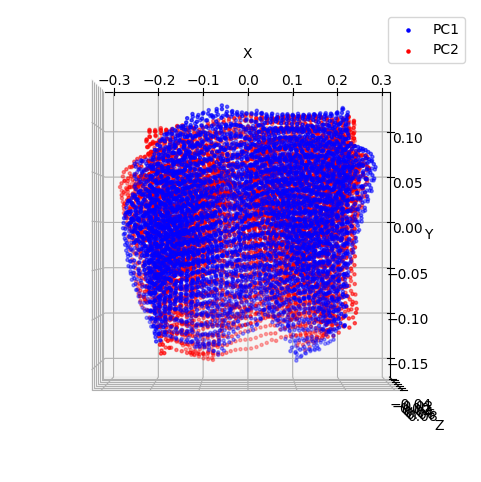

In [9]:
aligned_cur, goal_aligned = simple_rigid_align(last_step_particles_clean, goal_particle_clean)
mdp = np.mean(np.linalg.norm(aligned_cur - goal_aligned, axis=1))
print('simple rigid', mdp)
plot_two_point_clouds(aligned_cur, goal_aligned, top_down=True)

complex rigid 0.03735943201518566


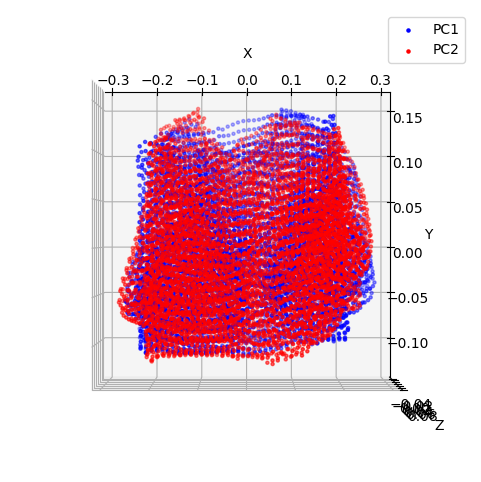

In [12]:
aligned_cur, goal_aligned = rigid_align(last_step_particles_clean, goal_particle_clean, 0.5484570742442401)
mdp = np.mean(np.linalg.norm(aligned_cur - goal_aligned, axis=1))
print('complex rigid', mdp)
plot_two_point_clouds(aligned_cur, goal_aligned, top_down=True)

deform 0.059555081757734996


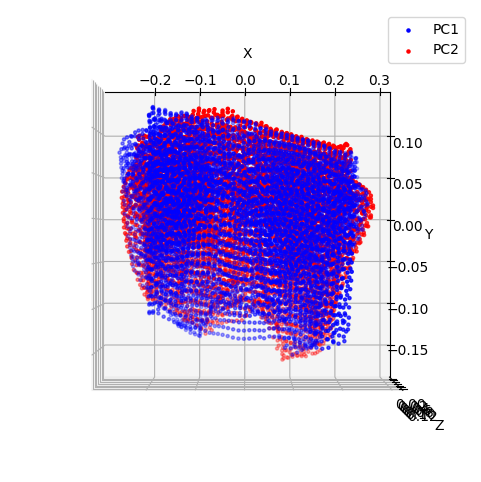

In [13]:
aligned_cur, goal_aligned = deformable_align(last_step_particles_clean, goal_particle_clean, 0.5484570742442401)
mdp = np.mean(np.linalg.norm(aligned_cur - goal_aligned, axis=1))
print('deform', mdp)
plot_two_point_clouds(aligned_cur, goal_aligned, top_down=True)

corase angles len 36
fine angles len 10
chamfer rotate 0.059555081757734996


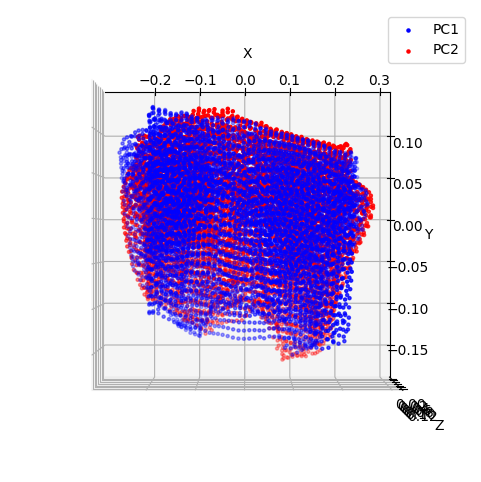

In [14]:
aligned_curr, aligned_goal = chamfer_alignment_with_rotation(last_step_particles_clean, goal_particle_clean)
mdp = np.mean(np.linalg.norm(aligned_cur - goal_aligned, axis=1))
print('chamfer rotate', mdp)
plot_two_point_clouds(aligned_cur, goal_aligned, top_down=True)